In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import random

import scipy.stats as stats

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('../data/kandidater_data.csv').dropna()

In [4]:
mask = df.Gender == 'M'

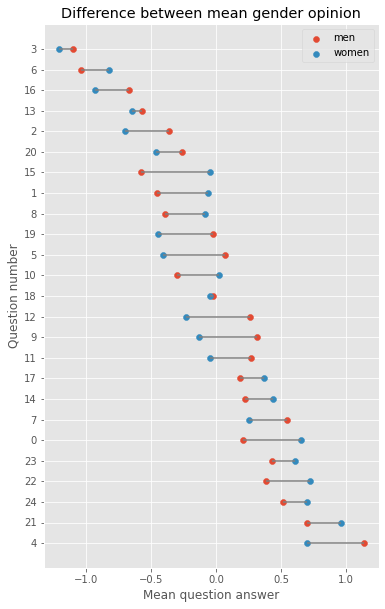

In [54]:
fig, ax = plt.subplots(figsize=(6,10))
y = np.arange(25)
x1 = np.array([df[mask][str(i)].mean() for i in range(1, 26)])
x2 = np.array([df[~mask][str(i)].mean() for i in range(1, 26)])

X = np.vstack((x1, x2)).T
idx = np.argsort(-np.mean(X, axis=1))
# idx = np.argsort(np.abs(x1 - x2))
x1 = x1[idx]
x2 = x2[idx]

for n in y:
    a = min(x1[n], x2[n])
    b = max(x1[n], x2[n])
    ax.hlines(n, a, b, color='grey')

ax.scatter(x1, y, label='men')
ax.scatter(x2, y, label='women')

ax.set_yticks(y)

ax.set_title('Difference between mean gender opinion')
ax.set_xlabel('Mean question answer')
ax.set_ylabel('Question number')

ax.set_yticklabels(y[idx])
ax.legend()